# Banco Portugal - Bank term deposit marketing campaign

![Bank image](Bank_header.jpg)

## 📚 Background

The past few campaigns of `Banco Portugal` have not gone as well as the company would have hoped, and they are looking for ways to optimize their marketing efforts. The campaigns aimed to sell subscriptions to a bank term deposit through phone calls.

They have supplied you with data from a previous campaign. The manager would like to know what factors are most likely to increase a customer's probability of subscribing.

## 📓 Data dictionary

* `age`: age of customer
* `job`: type of job
* `marital`: marital status
* `education`: highest degree of customer
* `default`: has credit in default?
* `balance`: balance level
* `housing`: has housing loan?
* `loan`: has a personal loan?
* `day`: last contact day of the month
* `month`: last contact month of year
* `duration`: last contact duration, in seconds
* `campaign`: number of contacts performed during this campaign and for this client
* `pdays`: number of days that passed by after the client was last contacted from a previous campaign
* `previous`: number of contacts performed before this campaign and for this client
* `poutcome`: outcome of the previous marketing campaign
* `response`: has the client subscribed a term deposit?

## 💻 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math

## ⬇️ Loading the data

In [2]:
df = pd.read_csv("bank_marketing.csv") # load the file bank_marketing.csv

## 🔍 Looking at the data

- First look at the data
- Look to the data types
- Look for unique values
- Look for missing values

In [3]:
# let us have a first look at the first rows of the dataset
df.head()

,CliendID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [4]:
# let us have a first look at the last rows of the dataset
df.tail()

,CliendID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [5]:
# Let us have a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CliendID         40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [6]:
# Let us have a look at the numerical values
df.describe()

,CliendID,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [7]:
# Let us have a look at the unique values for object data type columns

cat_columns = df.describe(include=["object"]).columns

for i in cat_columns:
    if i in df.columns:
        print("Unique values in", i, "are:")
        print(df[i].value_counts())
        print("*" * 50)

Unique values in job are:
blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: job, dtype: int64
**************************************************
Unique values in marital are:
married     24641
single      11443
divorced     4757
Name: marital, dtype: int64
**************************************************
Unique values in education are:
secondary    21933
tertiary     12380
primary       6528
Name: education, dtype: int64
**************************************************
Unique values in default are:
no     40078
yes      763
Name: default, dtype: int64
**************************************************
Unique values in housing are:
yes    22820
no     18021
Name: housing, dtype: int64
**************************************************
Unique values in loan are:
no   

### Observations

* It appears that the most recent contact in all cases occurred a long time ago, as indicated by the values of `pdays` being equal to 999.
* Additionally, none of the customers have any previous outcomes registered, as all the values for `previous` are equal to 0.
* The column `nr.employed` also exhibits no variation across the rows.
* It is evident that all the contacts were made via phone (`contact`), in the month of May (`month`), and no previous outcome (`poutcome`) was recorded.
* Consequently, all the aforementioned columns will be removed from the dataset.

## 🧹Data cleaning

* It is noticeable that the `pdays` column contains certain values represented as -1, which appears to be an inconsistency in the records and could potentially affect the calculations. To address this issue, let's replace the value of -1 with NaN (Not a Number).

In [8]:
df['pdays'] = df['pdays'].replace(-1, np.nan) # replace all values -1 by NaN

## 📈 Exploratory Data Analysis

In [9]:
# Defining some supporting functions to help during the data visualization

sns.set_palette("Spectral")

def countplot_absrel(data,feature,xlbl,ylbl,ttl,figsize=(8,5),hue=None,barlabel=True):

    """
    Plot countplot graph with absolute and relative labels over the bars

    data: dataframe
    feature: dataframe column
    xlbl: label for x-axis
    ylbl: label for y-axis
    ttl: chart title
    figsize: size of figure (default (8,5))
    hue: variable to hue
    barlabel: Boolean value to apply or not barlabels
    """
    
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=feature, data=data, order=data[feature].value_counts(ascending=False).index, hue=hue)
    ax.set(xlabel=xlbl, ylabel=ylbl, title=ttl)
    if barlabel == True:
        abs_values = data[feature].value_counts(ascending=False).values
        rel_values = data[feature].value_counts(ascending=False, normalize=True).values * 100
        lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
        ax.bar_label(container=ax.containers[0], labels=lbls)
    plt.show()    

def boxplotf(data,x,y,xlbl,ylbl,ttl,figsize=(6,2)):

    """
    Plot a boxplot graph

    data: dataframe
    x: feature in x-axis
    y: feature in x-axis
    xlbl: label for x-axis
    ylbl: label for y-axis
    ttl: chart title
    figsize: size of figure (default (6,2))
    """
    
    plt.figure(figsize=figsize)
    ax = sns.boxplot(y=y, x=x, data=data)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(ttl)
    plt.show()

def hist_hueresponse(data,x,xlbl,ttl,figsize=(6,4),hue="response"):

    """
    Plot a histogram graph for a feature hueing with response variable

    data: dataframe
    x: feature in x-axis
    xlbl: label for x-axis
    ylbl: label for y-axis
    ttl: chart title
    figsize: size of figure (default (8,6))
    hue: select hue variable, "response" variable as default
    """
    
    plt.figure(figsize=figsize)
    ax = sns.histplot(x=x, data=data, hue=hue)
    plt.xlabel(xlbl)
    plt.ylabel("Count")
    plt.title(ttl)
    plt.show()
    

def piechart_hueresponse(data,x,ttl,figsize=(8,3),hue="response"):
    
    """
    Plot a pie chart for the different unique values of a feature, hueing with response variable

    data: dataframe
    x: feature
    ttl: chart title
    figsize: size of figure (default (8,3))
    hue: select hue variable, "response" variable as default
    """

    fig,ax=plt.subplots(1,data[x].nunique(),figsize=figsize)
    for i,col in enumerate(data[x].unique()):
        ax[i].pie(x=data[data[x]==col][hue].value_counts(),
            labels=data[data[x]==col][hue].value_counts().index,autopct='%1.1f%%')
        ax[i].set_title(col)
    fig.suptitle(ttl)

### 🎯a. target variable

* Let us explore the target variable, in other words, what is the proportion of customers who subscribed to the bank term deposit.

### What is the proportion of people who subscribed to the bank term deposit?

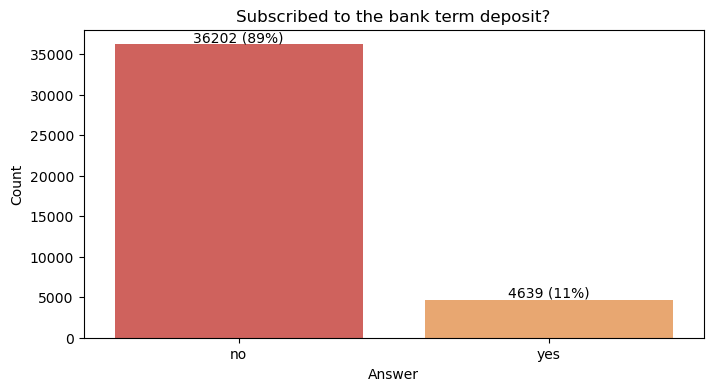

In [10]:
countplot_absrel(df,"response","Answer","Count","Subscribed to the bank term deposit?", figsize=(8,4))

* From a total of 40800 calls offering the bank term deposit, the success rate was 11%.

### Customer profile

#### Let us see what is the customer profile to identify who are the people currently subscribing for the bank term deposit. We will check:
* Age
* Job
* Marital status
* Education

## Age

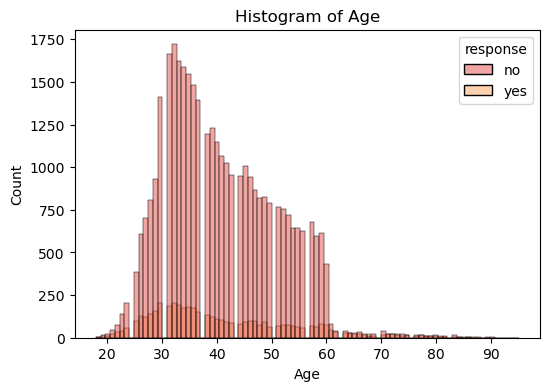

In [11]:
hist_hueresponse(df,"age","Age","Histogram of Age")

#### Let us analyze the `age` by categories, dividing the ages into groups

In [12]:
bins= [0,24,60,100] # defining the bin's ranges
labels = ['Youth','Adult','Senior'] # defining the labels for each range
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) # creating a new column AgeGroup assinging a label for each range

#### Let us check how each age group behaves in respect to the subscription:

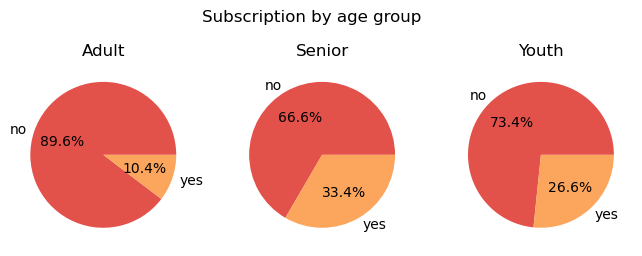

In [13]:
piechart_hueresponse(df,"AgeGroup", "Subscription by age group")

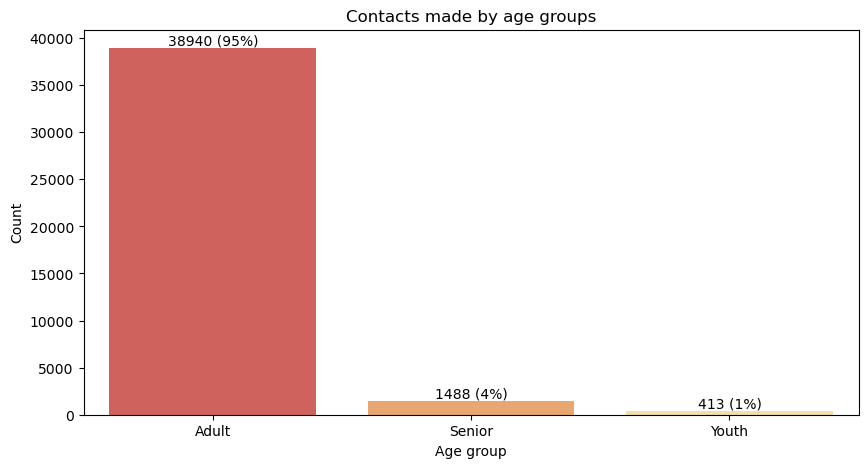

In [14]:
countplot_absrel(df,"AgeGroup","Age group","Count","Contacts made by age groups",figsize=(10,5))

### Observations about `age`:
* The Senior category has the highest success rate, with 33% of successes, followed by the Youth group, which has an almost 27% success rate.
* However, the majority of contacts are made with adults. Seniors and Youths account for only 4% and 1% of all contacts, respectively.

## Job

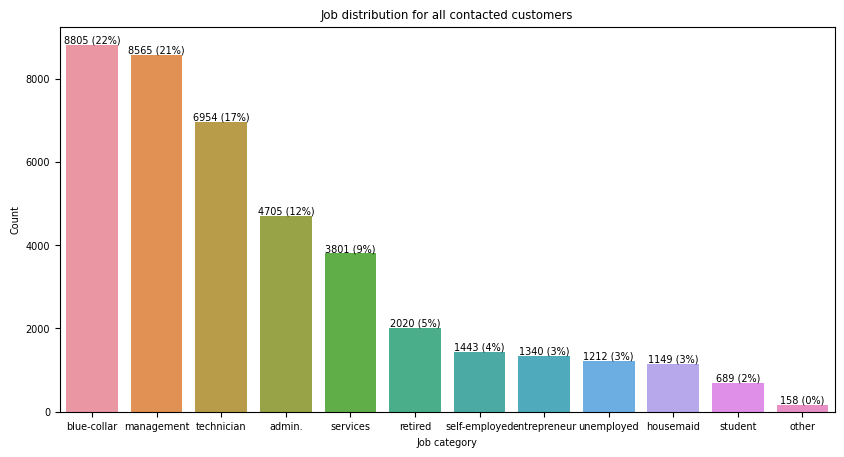

In [15]:
mpl.rcParams.update({'font.size': 7})
countplot_absrel(df,"job","Job category","Count","Job distribution for all contacted customers",figsize=(10,5))
mpl.rcParams.update({'font.size': 10})

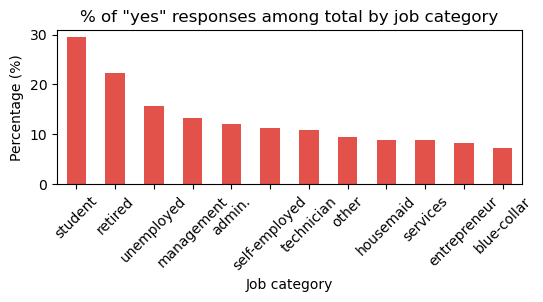

In [16]:
result = df.groupby("job")['response'].value_counts(normalize=True).unstack() * 100
yes_percentages = result['yes'].sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(6, 2))
yes_percentages.plot(kind='bar')
plt.title('% of "yes" responses among total by job category')
plt.xlabel('Job category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

### Observations about `job`:
* The five most commonly contacted customers are blue-collar workers, managers, technicians, administrative staff, and service industry workers.
* On the other hand, the five job categories with the highest success rates are students, retirees, unemployed individuals, managers, and administrative staff.

## Marital status

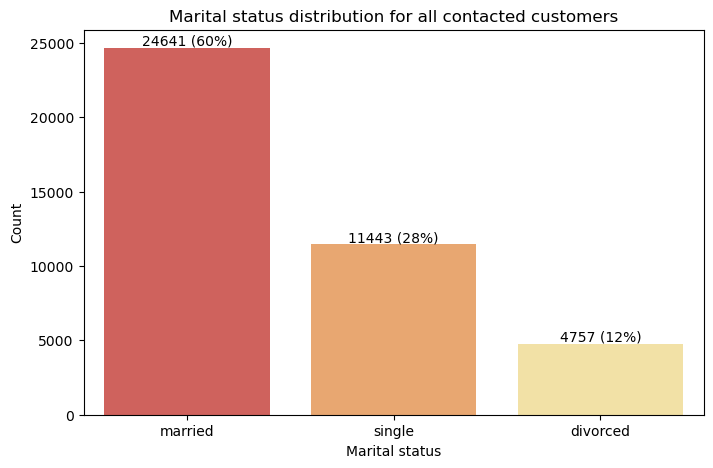

In [17]:
countplot_absrel(df,"marital","Marital status","Count","Marital status distribution for all contacted customers",figsize=(8,5))

#### Let us see how the offer subcription distributes along the `marital` status:

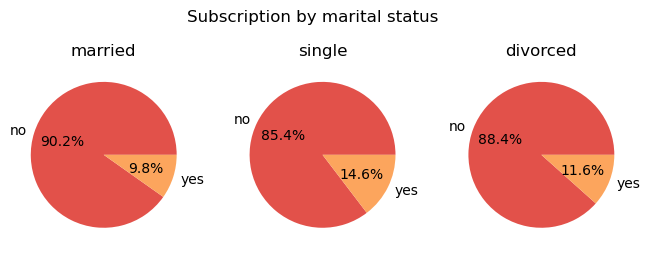

In [18]:
piechart_hueresponse(df,"marital","Subscription by marital status")

### Observations about `marital` status:
* Most of the contacted people are married, followed by single and divorced customers.
* Among the customers who subscribed to the bank term deposits, single individuals show the highest success rate for this offer.

## Education

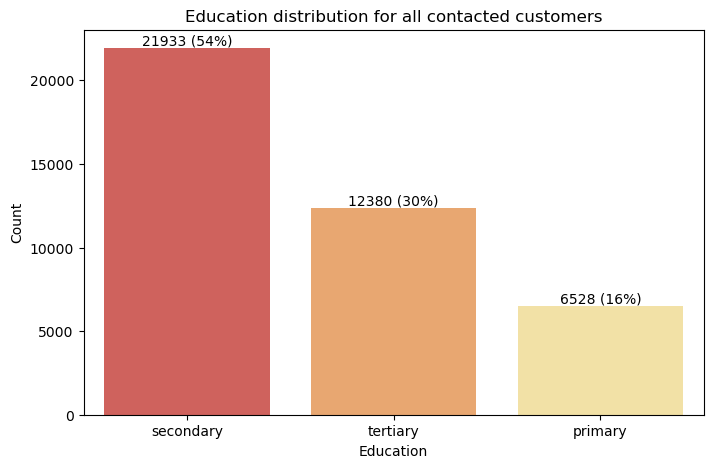

In [19]:
countplot_absrel(df,"education","Education","Count","Education distribution for all contacted customers",figsize=(8,5))

#### Let us see how the offer subcription distributes along the `education` categories:

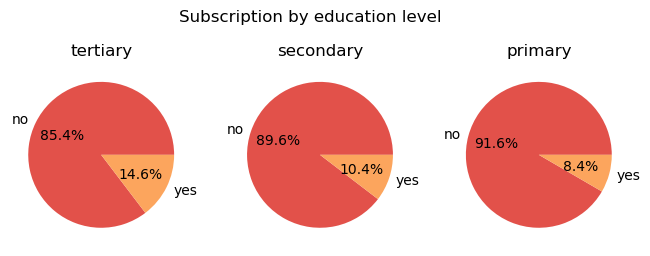

In [20]:
piechart_hueresponse(df,"education", "Subscription by education level")

### Observations about `education` category:
* Most of the contacted people have only the secondary education.
* On the other hand, customers with tertiary education shows the higher success rate among the trhee categories.

## Finance profile

#### Let us see what is the finance profile to identify who are the people currently subscribing for the bank term deposit. We will check:

* Has the customer credit in default?
* What is the balance level?
* Has the customer a housing loan?
* Has the customer a personal loan?

### Credit in default

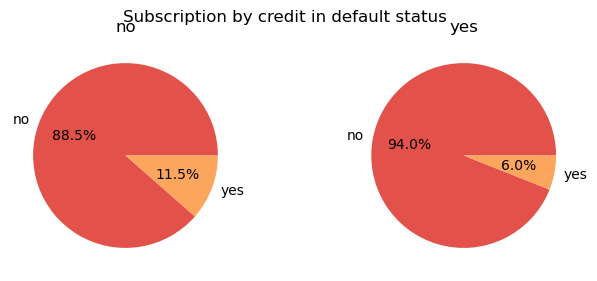

In [21]:
piechart_hueresponse(df,"default", "Subscription by credit in default status")

### Observations about `default` category:
* Among the customers who have no credit in default, 11% accepted the bank term deposit offer, while only 6% of customers who had credit in default made the same choice.

## Balance

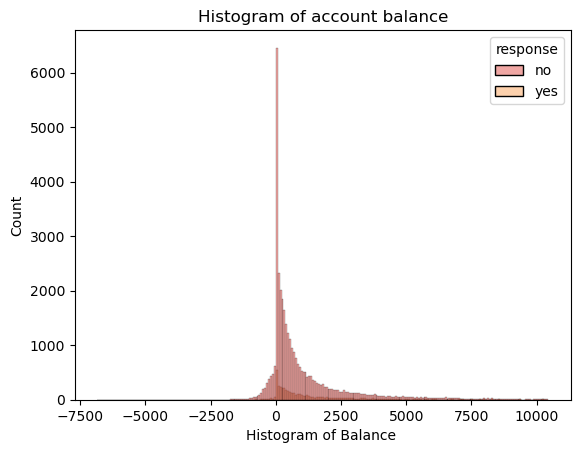

In [22]:
sns.histplot(x="balance", data=df, hue="response")
plt.xlabel("Histogram of Balance ")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title('Histogram of account balance')  # Set the title for the plot
plt.show()

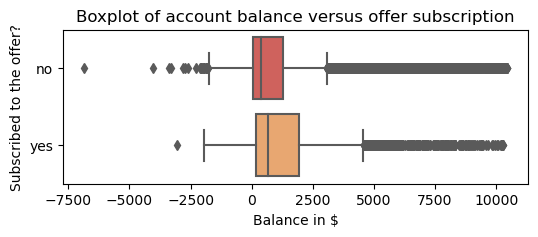

In [23]:
boxplotf(df,"balance","response","Balance in $","Subscribed to the offer?","Boxplot of account balance versus offer subscription")

In [24]:
df.groupby('response')['balance'].mean()

response
no     1031.402602
yes    1406.262988
Name: balance, dtype: float64

### Observations about `balance` category:

* The average balance is a little bit higher for the customers who accepted the bank term deposit subscription. In addition, there is only few outliers with negative balance in this group. 

## Housing loan

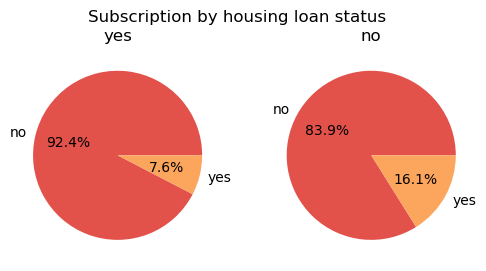

In [25]:
piechart_hueresponse(df,"housing", "Subscription by housing loan status",figsize=(6,3))

## Personal loan

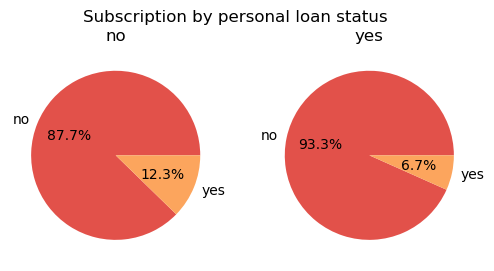

In [26]:
piechart_hueresponse(df,"loan", "Subscription by personal loan status",figsize=(6,3))

### Observations about `housing` loan and personal `loan` categories:

* The success rate within the customers who have no housing loan and no personal loan was high, 16 and 12%, respectively, when  compared to the group that has active loans.

## Contact profile

#### Let us see how the different contact profile influences in the bank term depsoit subscription. We will check:

* Last contact day of the month
* Last contact month of year
* Last contact duration in seconds
* Number of contacts performed during this campaign and for this client
* Number of contacts performed before this campaign and for this client
* Number of days that passed by after the client was last contacted from a previous campaign
* Outcome of the previous marketing campaign

### Day of the month

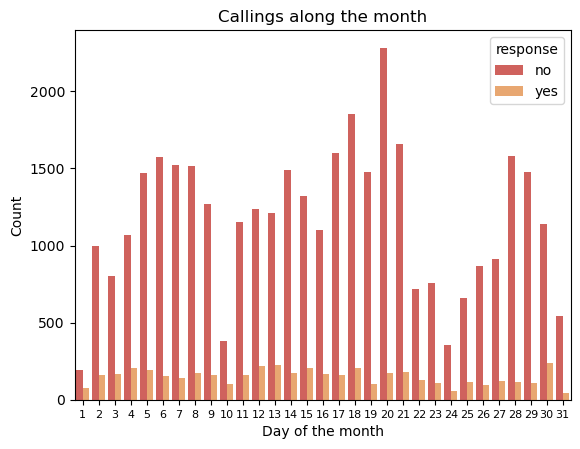

In [27]:
sns.countplot(x="day", data=df, hue="response")
plt.xlabel("Day of the month")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title('Callings along the month')  # Set the title for the plot
plt.xticks(fontsize=8)
plt.show()

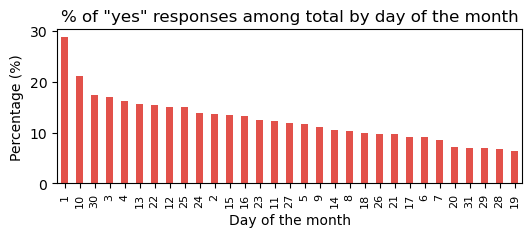

In [28]:
result = df.groupby("day")['response'].value_counts(normalize=True).unstack() * 100
yes_percentages = result['yes'].sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(6, 2))
yes_percentages.plot(kind='bar')
plt.title('% of "yes" responses among total by day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Observations about `day` of the month:

* It is interesting to note that the first day of the month achieves a success rate of almost 30%. However, it is also worth mentioning that it is the day with the fewest number of calls. A similar trend can be observed with the second best day, which is the 10th.
* On the contrary, days with a high volume of calls, such as the 19th and 20th, exhibit a very poor success rate.

### Month of the year

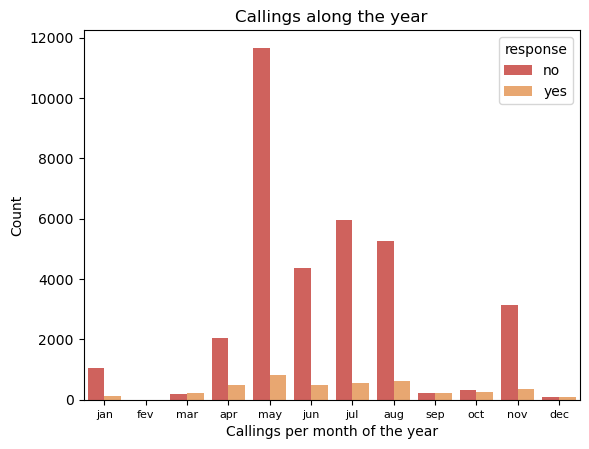

In [29]:
sns.countplot(x="month", data=df, hue="response", order=["jan", "fev", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.xlabel("Callings per month of the year")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title('Callings along the year')  # Set the title for the plot
plt.xticks(fontsize=8)
plt.show()

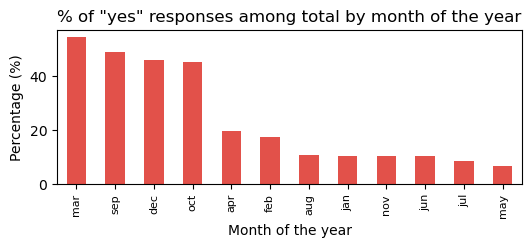

In [30]:
result = df.groupby("month")['response'].value_counts(normalize=True).unstack() * 100
yes_percentages = result['yes'].sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(6, 2))
yes_percentages.plot(kind='bar')
plt.title('% of "yes" responses among total by month of the year')
plt.xlabel('Month of the year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Observations about `month` of the year:

* The success rates for the months of March, September, December, and October are higher than 40%, which is more than double compared to the other months of the year. On the other hand, these months show a significantly lower number of calls in comparison to the rest of the year.

### Last contact duration

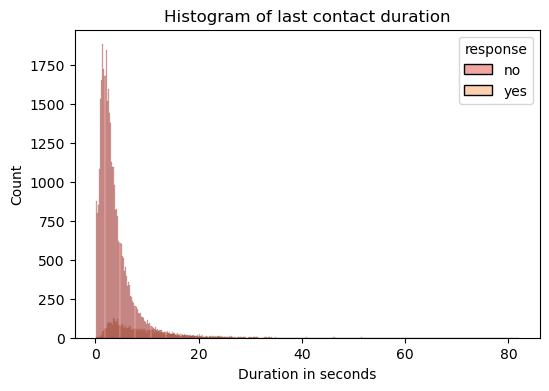

In [31]:
hist_hueresponse(df,"duration","Duration in seconds","Histogram of last contact duration")

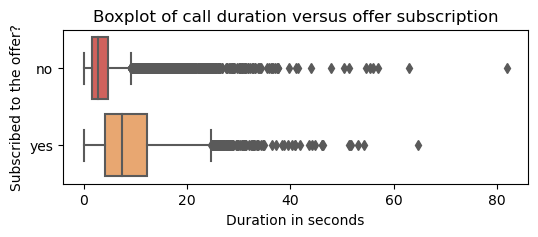

In [32]:
boxplotf(df,"duration","response","Duration in seconds","Subscribed to the offer?","Boxplot of call duration versus offer subscription")

In [33]:
df.groupby("response")["duration"].median()

response
no     2.73
yes    7.37
Name: duration, dtype: float64

### Observations about `duration` of the offer call:

* The duration of successful offer calls is almost three times longer than the unsuccessful ones. Interestingly, some unsuccessful calls exhibit extreme durations exceeding 30 minutes.

### Number of contacts during the current campaign

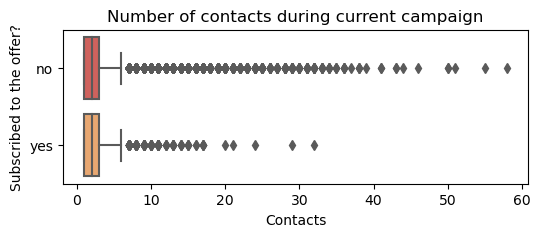

In [34]:
boxplotf(df,"campaign","response","Contacts","Subscribed to the offer?","Number of contacts during current campaign")

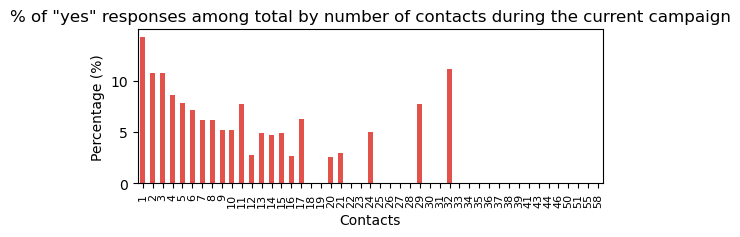

In [35]:
result = df.groupby("campaign")['response'].value_counts(normalize=True).unstack() * 100
yes_percentages = result['yes']

# Create the bar chart
plt.figure(figsize=(6, 2))
yes_percentages.plot(kind='bar')
plt.title('% of "yes" responses among total by number of contacts during the current campaign')
plt.xlabel('Contacts')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Observations about number of contacts during the current `campaign`:

* The success rate shows a continuous decrease after the first contact. It is worth noting that the higher success rates observed after 10 calls are considered outliers.

### Period of time for a new contact since last call

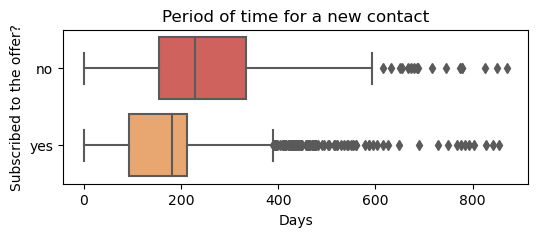

In [36]:
boxplotf(df,"pdays","response","Days","Subscribed to the offer?","Period of time for a new contact")

### Observations about the period of time for a new contact since last call

* For shorter periods of time between consecutive contacts, the success rate tends to be higher.

### Outcome of the previous marketing campaign

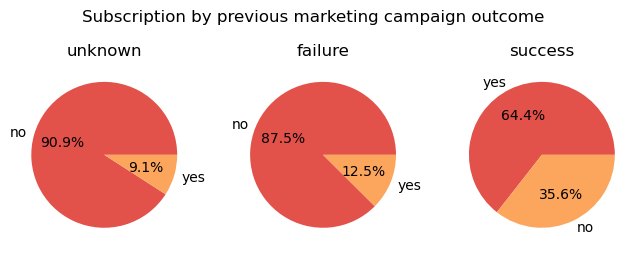

In [37]:
piechart_hueresponse(df,"poutcome", "Subscription by previous marketing campaign outcome")

In [38]:
print(df.groupby('poutcome')['response'].value_counts().unstack())
print("\nPercentage of \'poutcome\' not labeled:",df[df["poutcome"] == "unknown"]["poutcome"].count()/df["poutcome"].count()*100)

response     no   yes
poutcome             
failure    4069   579
success     495   896
unknown   31638  3164

Percentage of 'poutcome' not labeled: 85.21338850664773


### Observations about the outcome of the previous marketing campaign

* Based on the available data, it can be inferred that customers who have previously subscribed to the bank term deposit in previous campaigns are more likely to make a new subscription. However, it is important to note that the majority of calls (more than 85%) are not labeled as either success or no success. This lack of specific labeling hinders further analysis regarding the recurrence of bank term deposits.

## Insights & Recommendations

#### Targeting Senior and Youth Groups:
* Although the Senior and Youth groups have the highest success rates, they represent a small percentage of our overall contacts. It is recommended to develop targeted marketing campaigns for each group, taking into account their unique goals and preferences.
* Allocate additional resources to reach out to these groups through channels that connect with them, such as social media platforms or community events.
* Tailor messaging and offers specifically to address the needs and interests of Seniors and Youths, highlighting the benefits of our services in a way that aligns with their respective age groups.

#### Focus on Students, Retirees, Unemployed Individuals, Managers, and Administrative Staff
* These job categories exhibit high success rates and should be prioritized in our marketing efforts.
* Customize our approach for each job category to ensure messaging aligns with their specific needs and challenges.
* Develop targeted campaigns that highlight how our services can cater to the unique circumstances and requirements of these groups.
#### Timing of Calls
* The first day of the month shows a significantly higher success rate. Increase the number of calls made on this day to maximize success rates.
* Months with higher success rates, such as March, September, December, and October, should be targeted with increased call volumes to capitalize on the observed trend.
#### Enhance Data Labeling
* The lack of specific "previous outcome" labeling (`poutcome`) for a significant portion of calls impedes a deeper analysis of recurring bank term deposits.
* Implement a standardized process to label calls as success or no success consistently, enabling us to gain insights into customer behavior and improve future campaigns.

### Conclusion
By leveraging the insights gained from this data analysis, we can optimize our marketing strategies and enhance business performance. Targeting the Senior and Youth groups, along with specific job categories, and aligning our messaging with their needs will likely yield better results. Additionally, timing our calls strategically and addressing the decreasing success rates can further improve our outcomes. Enhancing data labeling practices will enable us to gain a deeper understanding of customer behavior and tailor our campaigns accordingly. By implementing these recommendations, we can effectively leverage data science techniques to optimize our business operations and drive success.